# Unsupervised Learning: Clustering Lab





In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [ ]:
# K-means with Abalone
abalone_data, meta = arff.loadarff('abalone.arff.txt')
abalone_df = pd.DataFrame(abalone_data)
target_column = ['Rings']
X = abalone_df
clf = KMeans(n_clusters=3, init='random', n_init=1)
clf.fit(X)
labels = clf.labels_
score = silhouette_score(X, labels)

print(f'Labels_: {labels}\n')
print(f'Cluster_centers_: {clf.cluster_centers_}\n')
print(f'n_iter_: {clf.n_init}\n')
print(f'inertia_: {clf.inertia_}\n')
print(f'silhouette_score: {score}')


Labels_: [2 1 0 0 1 1 2 2 0 2 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 1 2
 1 0 0 0 2 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 2 0 1 2 1 2 0
 2 2 0 0 0 2 0 0 2 2 2 0 2 0 0 0 2 0 2 0 2 2 0 1 1 0 1 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 2 1 1 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0
 1 1 2 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 1 1 1 1 1 1 1 1 0 2 2 0 0 0
 2 0 0 0 0 2 0 2 1 0 0 0 2 2 0]

Cluster_centers_: [[ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]
 [ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]]

n_iter_: 1

inertia_: 529.2542834566343

silhouette_score: 0.5184231751282088


*Discussion*

My silhouette score shows me that the groups were probably separated pretty good! It is not perfect but I know as we approach 1, the better the seperation.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [ ]:
# HAC with Abalone
HAC = AgglomerativeClustering(n_clusters=3,linkage='complete' )
HAC.fit(X)
HAC_labels = HAC.labels_
HAC_score = silhouette_score(X,HAC_labels)
print(f'labels_: {HAC_labels}\n')
print(f'score: {HAC_score}\n')

labels_: [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]

score: 0.5398112398376158



*Discussion*

HAC did better than just KMeans! It seems that it was able to separate by a little bit. I did a fun test and it performed better when k=2

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments
iris_data, meta = arff.loadarff('iris.arff.txt')
iris_df = pd.DataFrame(iris_data)
drop_class = ['class']
X = iris_df.drop(columns=drop_class)
for i in range(5):
  clf_kmeans = KMeans(n_init=1, n_clusters=4, init='random')
  clf_kmeans.fit(X)
  labels = clf_kmeans.labels_
  score = silhouette_score(X, labels)
  print(f'Inertia ({i+1}): {clf_kmeans.inertia_}')
  print(f'Score ({i+1}): {score}\n')

Inertia (1): 57.34839539170507
Score (1): 0.4970706490990157

Inertia (2): 71.3439991184537
Score (2): 0.41684514141972834

Inertia (3): 57.47327326549492
Score (3): 0.49511999553021513

Inertia (4): 71.33622242453569
Score (4): 0.41854525161533473

Inertia (5): 57.371759292881016
Score (5): 0.49595535840401567



In [ ]:
clf_kmeans = KMeans(n_init=5, n_clusters=4, init='random')
clf_kmeans.fit(X)
labels = clf_kmeans.labels_
score = silhouette_score(X, labels)
print(f'Inertia: {clf_kmeans.inertia_}')
print(f'Score: {score}\n')

Inertia: 57.34839539170507
Score: 0.4970706490990157



In [ ]:
clf_kmeans = KMeans(n_init=1, n_clusters=4, init='k-means++')
clf_kmeans.fit(X)
labels = clf_kmeans.labels_
score = silhouette_score(X, labels)
print(f'Inertia: {clf_kmeans.inertia_}')
print(f'Score: {score}\n')

Inertia: 57.47327326549492
Score: 0.49511999553021513



Results and Discussion

The first batch I did, I noticed a concensus that the majority of runs had an inertia of 57 and the score was about .49

The second set of code had a very similar inertia value and score as the first set of code (the 5 interations)

The third set of code followed the trend and mimicked the inertia and score of the previous two.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

Intertia (k=2): 5142376.455984384
Score (k=2): 0.5687897205830247


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


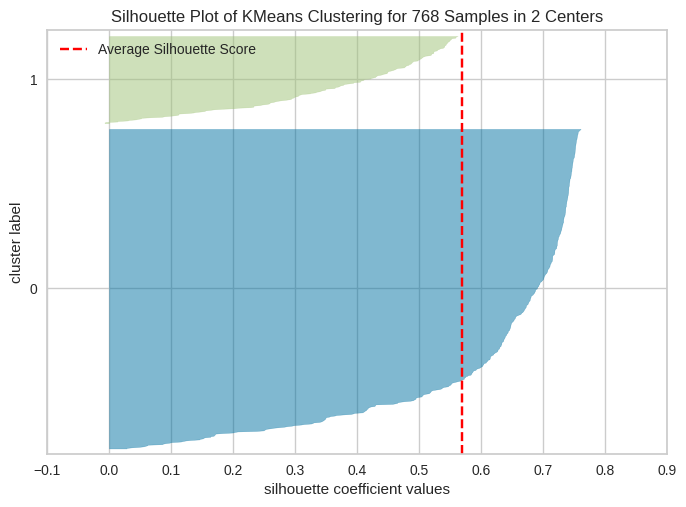

Intertia (k=3): 2932905.8813211545
Score (k=3): 0.5017597810089426


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


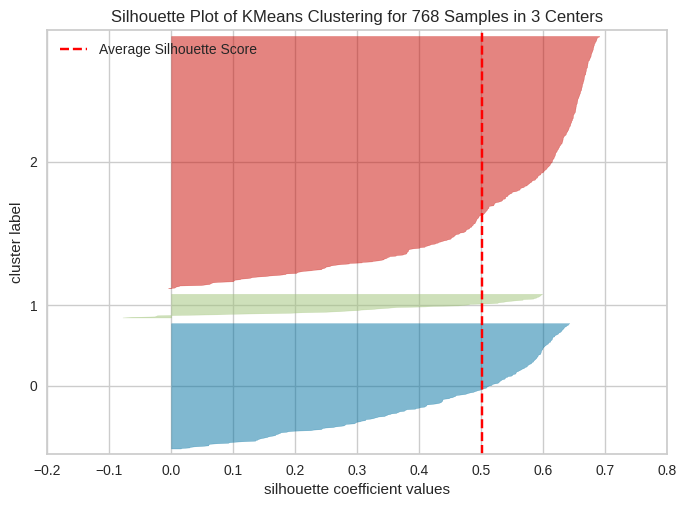

Intertia (k=4): 2151320.9380038553
Score (k=4): 0.425157227030241


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


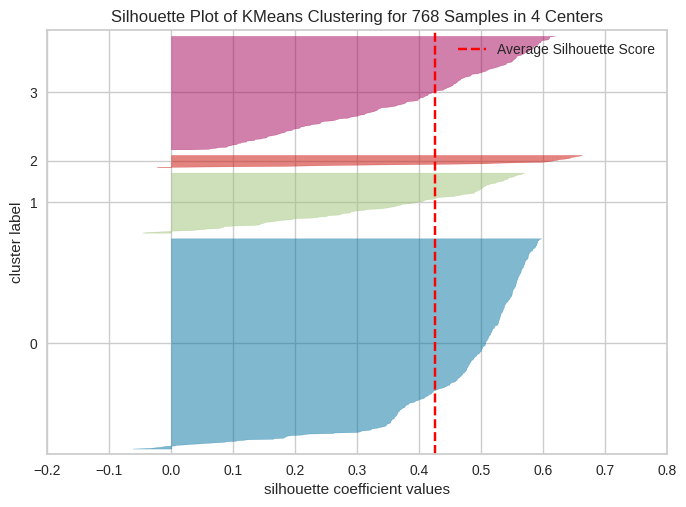

Intertia (k=5): 1847887.6673841877
Score (k=5): 0.3179277319932468


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


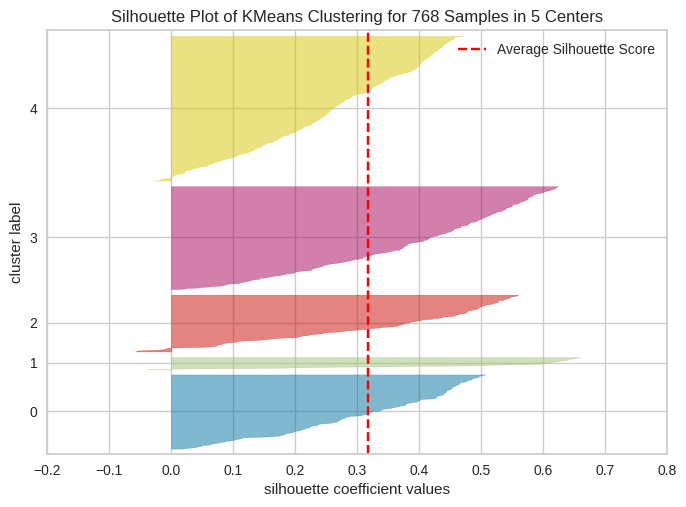

Intertia (k=6): 1467132.5326951921
Score (k=6): 0.3291711283906112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


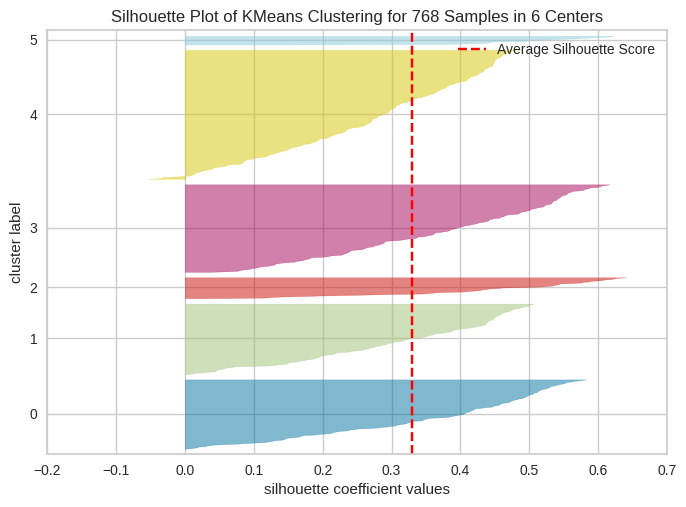

In [ ]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer
# y=iris_data[drop_class]
for i in range(2,7):
  model = KMeans(n_clusters=i, n_init=1)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  model.fit(X)
  labels = model.labels_
  score = silhouette_score(X, labels)
  print(f'Intertia (k={i}): {model.inertia_}')
  print(f'Score (k={i}): {score}')
  visualizer.fit(X)
  visualizer.show()


Discuss your results and justify which clustering is best based on the silhouette graphs

I found that the more cluster groups, that the worse the silhouette score. So for that reason I am going with k=2.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris
for i in range(2,7):
  HAC = AgglomerativeClustering(n_clusters=i,linkage='single' )
  HAC.fit(X)
  HAC_labels = HAC.labels_
  HAC_score = silhouette_score(X,HAC_labels)
  print(f'score (k={i}): {HAC_score}\n')

score (k=2): 0.6863930543445408

score (k=3): 0.5118387098922373

score (k=4): 0.28177774044073334

score (k=5): 0.2834836728123189

score (k=6): 0.2211144115880162



In [ ]:
for i in range(2,7):
  HAC = AgglomerativeClustering(n_clusters=i,linkage='average' )
  HAC.fit(X)
  HAC_labels = HAC.labels_
  HAC_score = silhouette_score(X,HAC_labels)
  print(f'score (k={i}): {HAC_score}\n')

score (k=2): 0.6863930543445408

score (k=3): 0.5539343898551252

score (k=4): 0.47166531675930684

score (k=5): 0.4303416822141368

score (k=6): 0.34065865237555976



In [ ]:
for i in range(2,7):
  HAC = AgglomerativeClustering(n_clusters=i,linkage='complete' )
  HAC.fit(X)
  HAC_labels = HAC.labels_
  HAC_score = silhouette_score(X,HAC_labels)
  print(f'score (k={i}): {HAC_score}\n')

score (k=2): 0.5160600757054667

score (k=3): 0.5133502348448076

score (k=4): 0.4995741149430846

score (k=5): 0.34999771139358965

score (k=6): 0.34205174735616767



In [ ]:
for i in range(2,7):
  HAC = AgglomerativeClustering(n_clusters=i,linkage='ward')
  HAC.fit(X)
  HAC_labels = HAC.labels_
  HAC_score = silhouette_score(X,HAC_labels)
  print(f'score (k={i}): {HAC_score}\n')

score (k=2): 0.6863930543445408

score (k=3): 0.5540972908150553

score (k=4): 0.4887398491004218

score (k=5): 0.4841553526240121

score (k=6): 0.3618845152256815



*Discussion and linkage comparison*

Here is a ranking of how they performed:

1) Ward

2) Average

3) Complete

4) Single

So Ward and average performed better overall pretty clearly. I placed "Complete" ahead of "Single" because even though Single initially started out higher than Complete, Complete was more consistent as k increased.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [ ]:
# Run both algoriths on a data set of your choice
diabetes_dataset, meta=arff.loadarff('dataset_37_diabetes.arff')
diabetes_df = pd.DataFrame(diabetes_dataset)
X = diabetes_df.drop(columns='class')

for i in range(2,7):
  kmean = KMeans(n_init=1, n_clusters=i, init='random')
  kmean.fit(X)
  labels = kmean.labels_
  score = silhouette_score(X, labels)
  print(f'Intertia (k={i}): {kmean.inertia_}')
  print(f'Score (k={i}): {score}\n')

Intertia (k=2): 5142376.455984384
Score (k=2): 0.5687897205830247

Intertia (k=3): 2932905.8813211545
Score (k=3): 0.5017597810089426

Intertia (k=4): 2151320.9380038553
Score (k=4): 0.425157227030241

Intertia (k=5): 1847887.6673841877
Score (k=5): 0.3179277319932468

Intertia (k=6): 1679924.4636867028
Score (k=6): 0.34111097027610127



In [ ]:
for i in range(2,7):
  HAC = AgglomerativeClustering(n_clusters=i,linkage='ward')
  HAC.fit(X)
  HAC_labels = HAC.labels_
  HAC_score = silhouette_score(X,HAC_labels)
  print(f'score (k={i}): {HAC_score}\n')

score (k=2): 0.5532678504628996

score (k=3): 0.5281675826566276

score (k=4): 0.3903545584456188

score (k=5): 0.3974185545295222

score (k=6): 0.32612703844294894



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


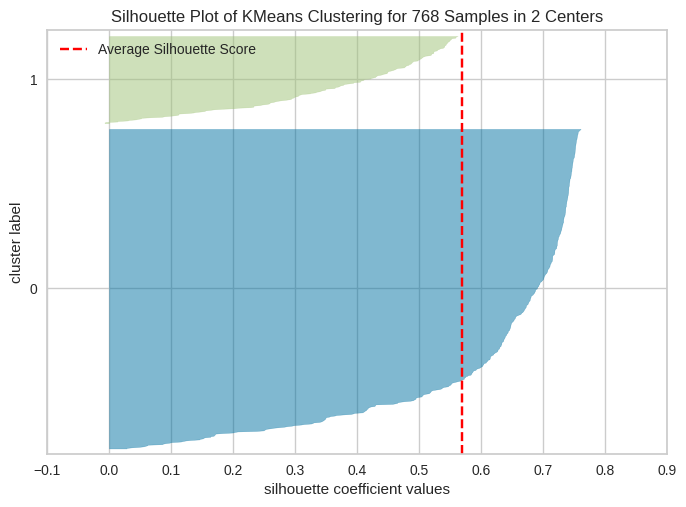

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 768 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(n_init=1, n_clusters=2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
model.fit(X)
labels = model.labels_
score = silhouette_score(X, labels)
visualizer.fit(X)
visualizer.show()

*Discussion and comparison*

So the dataset that I chose did best when k=2. K means was actually the best from the parameters that I chose.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass